In [1]:
pip install emoji
pip install seaborn

SyntaxError: invalid syntax (1547754996.py, line 1)

In [7]:
import regex
import pandas as pd
import numpy as np
pip install emoji
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.ticker import MaxNLocator
from plotly import express as px
import seaborn as sns
from datetime import *
import datetime as dt

SyntaxError: invalid syntax (436902622.py, line 4)

In [ ]:
def startsWithDate(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False


In [ ]:
def startsWithAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India)
        '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US)
        '([+]\d{2} \d{4} \d{7})'           # Mobile Number (Europe)
    ]
    pattern = '^' + '|'.join(patterns)
    result = regex.match(pattern, s)
    if result:
        return True
    return False

In [ ]:
def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if startsWithAuthor(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [ ]:
data = []
conversation = r'C:\Users\BHARGAV\Music\WHATSAPP_CHAT\Updated_chat_data.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if startsWithDate(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [ ]:
data

[['05/02/2020', '10:00 am', 'Ed', 'We share our knowledge here and pass year'],
 ['05/02/2020', '10:01 am', 'Ed', '<Media omitted>'],
 ['05/02/2020', '10:01 am', 'Ed', 'Easy to communicate 🤣🤣🤣'],
 ['05/02/2020', '10:01 am', 'Rohit', '💪🏾'],
 ['05/02/2020', '10:01 am', 'Rohit', 'yeah'],
 ['05/02/2020', '12:22 pm', 'Ed', '<Media omitted>'],
 ['05/02/2020', '12:22 pm', 'Ed', 'Guys? Haha'],
 ['05/02/2020', '12:38 pm', 'Ed', 'You deleted this message'],
 ['05/02/2020', '12:38 pm', 'Ed', 'One of the answer'],
 ['05/02/2020', '12:39 pm', 'Rohit', '<Media omitted>'],
 ['05/02/2020', '12:39 pm', 'Rohit', '<Media omitted>'],
 ['05/02/2020', '12:39 pm', 'Rohit', '<Media omitted>'],
 ['05/02/2020',
  '12:39 pm',
  'Rohit',
  'My recursive, I studying sorting now and i will do all sorting question'],
 ['05/02/2020', '12:39 pm', 'Rohit', 'And send here also'],
 ['05/02/2020', '12:39 pm', 'Rohit', "Y'all check if tally"],
 ['05/02/2020', '12:40 pm', 'Rohit', "Haven't start on tree and hash yet"],
 ['0

In [ ]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\BHARGAV\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23/04/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\BHARGAV\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/04/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\BHARGAV\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26/04/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\BHARGAV\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/04/2020' in DD/MM/YYYY format. Provide format o

In [ ]:
df

,Date,Time,Author,Message
0,2020-05-02,10:00 am,Ed,We share our knowledge here and pass year
1,2020-05-02,10:01 am,Ed,<Media omitted>
2,2020-05-02,10:01 am,Ed,Easy to communicate 🤣🤣🤣
3,2020-05-02,10:01 am,Rohit,💪🏾
4,2020-05-02,10:01 am,Rohit,yeah
...,...,...,...,...
4691,2020-09-20,5:32 pm,Ed,who have finish math lecture ?
4692,2020-09-21,2:25 pm,Ed,You deleted this message
4693,2020-09-21,2:26 pm,Ed,<Media omitted>
4694,2020-09-21,2:26 pm,Rohit,onz onz


In [ ]:
df.tail(20)

,Date,Time,Author,Message
4676,2020-09-18,7:51 pm,Ed,😂 😂
4677,2020-09-18,7:51 pm,Rohit,She marking maybe
4678,2020-09-18,7:51 pm,Rohit,G3 few only marked right
4679,2020-09-18,7:51 pm,Rohit,I saw morning like 3 groups only
4680,2020-09-20,12:51 pm,Ed,<Media omitted>
4681,2020-09-20,12:52 pm,Ed,I see kk I can hidden it
4682,2020-09-20,12:53 pm,Rohit,Because we have shared alot private things her...
4683,2020-09-20,12:53 pm,Rohit,Np np
4684,2020-09-20,12:53 pm,Ed,OK Bro no worry
4685,2020-09-20,12:53 pm,Ed,@60183560200 can?


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4696 entries, 0 to 4695
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     4696 non-null   datetime64[ns]
 1   Time     4696 non-null   object        
 2   Author   4696 non-null   object        
 3   Message  4696 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 146.9+ KB


In [ ]:
#----- Displaying omitted media while exporting
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

263


In [ ]:
### ----------- Checking shape of dataset.
df.shape

### ---------- Checking basic information of dataset
df.info()

### ----------  Checking no. of null values in dataset
df.isnull().sum()

### ---------- Checking head part of dataset
df.head(20)

### -------- Checking tail part of dataset
df.tail(20)

### -------- Droping Nan values from dataset
df = df.dropna()
df = df.reset_index(drop=True)
df.shape

### --------- Checking no. of authors of group
df['Author'].nunique()

### --------- Checking authors of group
df['Author'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4696 entries, 0 to 4695
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     4696 non-null   datetime64[ns]
 1   Time     4696 non-null   object        
 2   Author   4696 non-null   object        
 3   Message  4696 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 146.9+ KB


array(['Ed', 'Rohit'], dtype=object)

In [ ]:
###--------  Adding one more column of "Day" for better analysis, here we use datetime library which help us to do this task easily.
weeks = {
0 : 'Monday',
1 : 'Tuesday',
2 : 'Wednesday',
3 : 'Thrusday',
4 : 'Friday',
5 : 'Saturday',
6 : 'Sunday'
}
df['Day'] = df['Date'].dt.weekday.map(weeks)

### ----------- Rearranging the columns for better understanding
df = df[['Date','Day','Time','Author','Message']]

### ----------- Changing the datatype of column "Day".
df['Day'] = df['Day'].astype('category')

### ---------- Looking newborn dataset.
df.head()

### ---------- Counting number of letters in each message
df['Letter'] = df['Message'].apply(lambda s : len(s))

### ---------- Counting number of word's in each message
df['Word'] = df['Message'].apply(lambda s : len(s.split(' ')))

### ---------- Function to count number of links in dataset, it will add extra column and store information in it.
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

###--------- Function to count number of media in chat.
MEDIAPATTERN = r'<Media omitted>'
df['Media_Count'] = df.Message.apply(lambda x : regex.findall(MEDIAPATTERN, x)).str.len()
media = np.sum(df.Media_Count)

###------- Looking into updated dataset
df

,Date,Day,Time,Author,Message,Letter,Word,urlcount,Media_Count
0,2020-05-02,Saturday,10:00 am,Ed,We share our knowledge here and pass year,41,8,0,0
1,2020-05-02,Saturday,10:01 am,Ed,<Media omitted>,15,2,0,1
2,2020-05-02,Saturday,10:01 am,Ed,Easy to communicate 🤣🤣🤣,23,4,0,0
3,2020-05-02,Saturday,10:01 am,Rohit,💪🏾,2,1,0,0
4,2020-05-02,Saturday,10:01 am,Rohit,yeah,4,1,0,0
...,...,...,...,...,...,...,...,...,...
4691,2020-09-20,Sunday,5:32 pm,Ed,who have finish math lecture ?,30,6,0,0
4692,2020-09-21,Monday,2:25 pm,Ed,You deleted this message,24,4,0,0
4693,2020-09-21,Monday,2:26 pm,Ed,<Media omitted>,15,2,0,1
4694,2020-09-21,Monday,2:26 pm,Rohit,onz onz,7,2,0,0


In [ ]:
total_messages = df.shape[0]
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
links = np.sum(df.urlcount)
print('Personal Chat Stats : ')
print('Total Number of Messages : {}'.format(total_messages))
print('Total Number of Media Messages : {}'.format(media_messages))
print('Total Number of Links : {}'.format(links))

Personal Chat Stats : 
Total Number of Messages : 4696
Total Number of Media Messages : 263
Total Number of Links : 17


In [ ]:
l = df.Author.unique()
for i in range(len(l)):
  ### -------Filtering out messages of particular user
  req_df = df[df["Author"] == l[i]]

  ### -------- req_df will contain messages of only one particular user
  print(f'--> Stats of {l[i]} <-- ')

  ### -------- shape will print number of rows which indirectly means the number of messages
  print('Total Message Sent : ', req_df.shape[0])

  ### -------- Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word']))/req_df.shape[0]
  w_p_m = ("%.3f" % round(words_per_message, 2))
  print('Average Words per Message : ', w_p_m)

  ### -------- media conists of media messages
  media = sum(req_df["Media_Count"])
  print('Total Media Message Sent : ', media)

  ### ------- links consist of total links
  links = sum(req_df["urlcount"])
  print('Total Links Sent : ', links)
  print()
  print('----------------------------------------------------------n')

--> Stats of Ed <-- 
Total Message Sent :  2140
Average Words per Message :  3.890
Total Media Message Sent :  163
Total Links Sent :  4

----------------------------------------------------------n
--> Stats of Rohit <-- 
Total Message Sent :  2556
Average Words per Message :  5.610
Total Media Message Sent :  100
Total Links Sent :  13

----------------------------------------------------------n


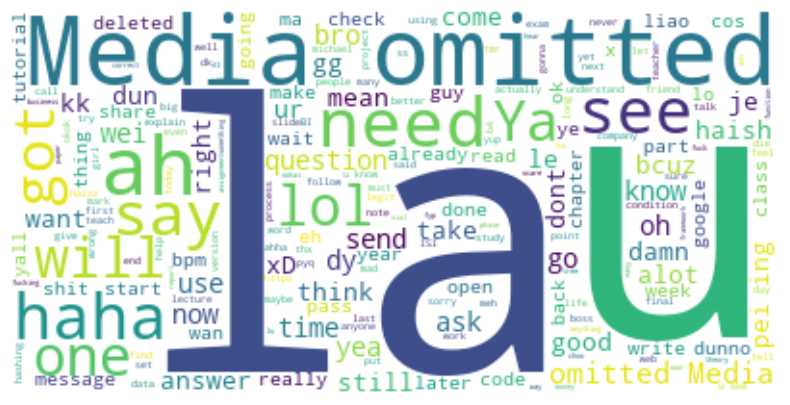

In [ ]:
### ------ Word Cloud of mostly used word in our Group
text = " ".join(review for review in df.Message)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

### ------ Display the generated image:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
###------ Creates a list of unique Authors
l = df.Author.unique()

for i in range(len(l)):
  ###------ Filtering out messages of particular user
  req_df = df[df["Author"] == l[i]]

  ###------ req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

Ed   ->   2140
Rohit   ->   2556


In [ ]:
l = df.Day.unique()
for i in range(len(l)):
  ### ------ Filtering out messages of particular user
  req_df = df[df["Day"] == l[i]]

  ###------- req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

Saturday   ->   492
Tuesday   ->   996
Thrusday   ->   735
Sunday   ->   691
Wednesday   ->   1007
Friday   ->   546
Monday   ->   229


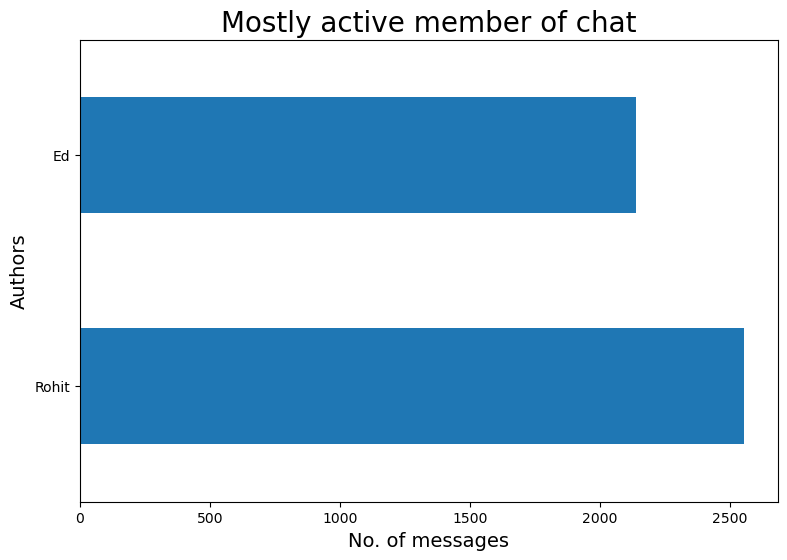

In [ ]:
### ------ Most Active Author in the chat
plt.figure(figsize=(9,6))
author_value_counts = df['Author'].value_counts() #--- Number of messages per author
most_active = author_value_counts.head(10) #--- Number of messages per author for the  most active author
most_active.plot.barh() #--- Plot a bar chart using pandas built-in plotting apis

plt.xlabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('Authors',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Mostly active member of chat',fontdict={'fontsize': 20,'fontweight': 8})
plt.show()

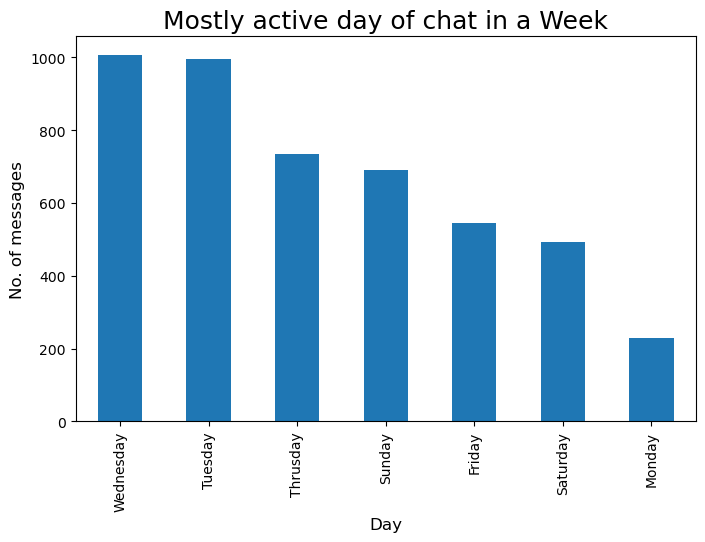

In [ ]:
### ------ Mostly Active day in the chat
plt.figure(figsize=(8,5))
active_day = df['Day'].value_counts()

### ------ Most active author in the chat is :
a_d = active_day.head(10)
a_d.plot.bar()
plt.xlabel('Day',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Mostly active day of chat in a Week',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

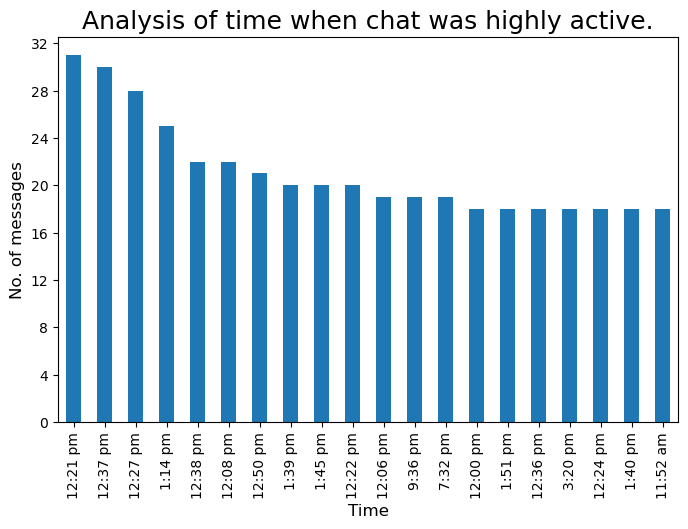

In [ ]:
###------  Time whenever the chat is highly active
plt.figure(figsize=(8,5))
t = df['Time'].value_counts().head(20)
tx = t.plot.bar()
tx.yaxis.set_major_locator(MaxNLocator(integer=True))  #----- Converting y axis data to integer
plt.xlabel('Time',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Analysis of time when chat was highly active.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

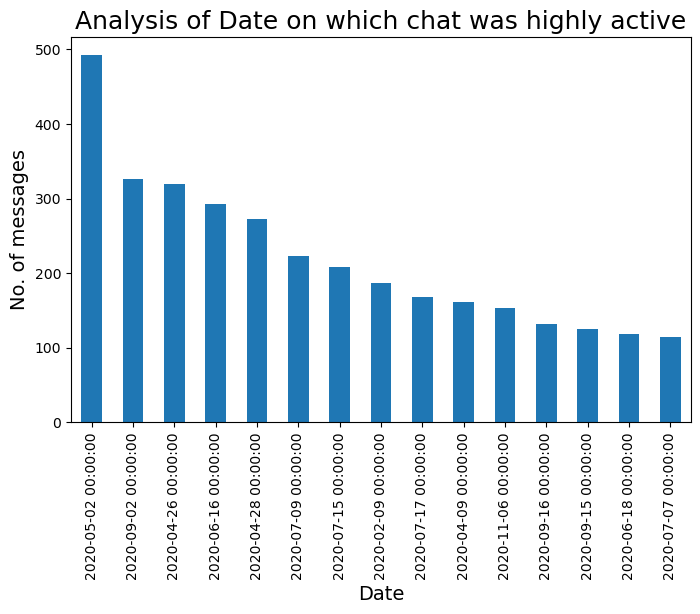

In [ ]:
###---- Date on which the chat highly active.
plt.figure(figsize=(8,5))
df['Date'].value_counts().head(15).plot.bar()
plt.xlabel('Date',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of Date on which chat was highly active',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

In [ ]:
lst = []
for i in df['Time']:
  out_time = datetime.strftime(datetime.strptime(i,"%I:%M %p"),"%H:%M")
  lst.append(out_time)
df['24H_Time'] = lst
df['Hours'] = df['24H_Time'].apply(lambda x : x.split(':')[0])

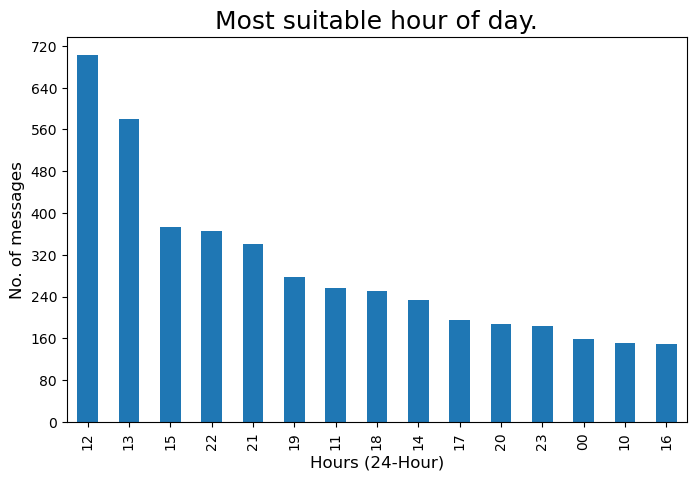

In [ ]:
###------ Most suitable hour of day, whenever there will more chances of getting responce from group members.
plt.figure(figsize=(8,5))
std_time = df['Hours'].value_counts().head(15)
s_T = std_time.plot.bar()
s_T.yaxis.set_major_locator(MaxNLocator(integer=True))  #Converting y axis data to integer
plt.xlabel('Hours (24-Hour)',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Most suitable hour of day.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.impute import SimpleImputer

In [3]:
# Reading Dataset
data=pd.read_csv(r"/content/drive/MyDrive/WHATSAPP_CHAT/text.csv")
data

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).

In [4]:
data.shape

(416809, 3)

In [5]:
data.columns

Index(['Unnamed: 0', 'text', 'label'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


In [7]:
data = data.drop('Unnamed: 0', axis=1)
data.shape

(416809, 2)

In [8]:
data.isnull().sum()

,0
text,0
label,0


In [9]:
label = data['label'].value_counts().reset_index()
label

,label,count
0,1,141067
1,0,121187
2,3,57317
3,4,47712
4,2,34554
5,5,14972


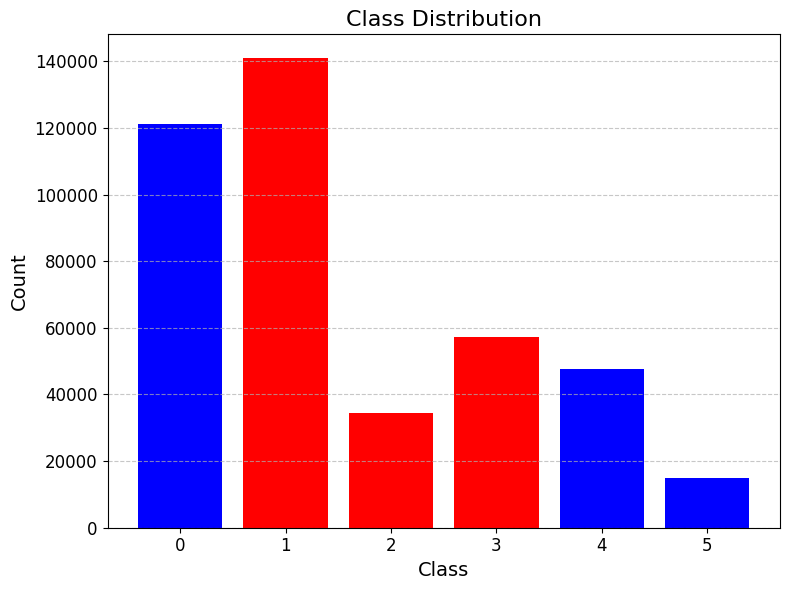

In [10]:
plt.figure(figsize=(8, 6))
# Get the counts of each class
class_counts = data['label'].value_counts()

# Use the index (class names) and values (counts) for the bar plot
plt.bar(class_counts.index, class_counts.values, color=['red', 'blue'])
plt.title('Class Distribution', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the graph
plt.show()

In [11]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [13]:
print("printing some random reviews")
print(10, data['text'].values[10])
print(100, data['text'].values[100])
print(1000, data['text'].values[1000])

printing some random reviews
10 i try to be nice though so if you get a bitchy person on the phone or at the window feel free to have a little fit and throw your pen at her face
100 i get the same feeling gp amp fab but then i always do
1000 im really feeling the pressure to provide justin friendly content


In [14]:
# Combining all the above stundents
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', str(sent))

        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [15]:
preprocessed_text = preprocess_text(data['text'].values)

100%|██████████| 416809/416809 [00:25<00:00, 16075.23it/s]


In [16]:
print("printing some random reviews")
print(10, preprocessed_text[10])
print(100, preprocessed_text[100])
print(1000, preprocessed_text[1000])

printing some random reviews
10 try nice though get bitchy person phone window feel free little fit throw pen face
100 get feeling gp amp fab always
1000 im really feeling pressure provide justin friendly content


In [17]:
data

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...
416804,i feel like telling these horny devils to find...,2
416805,i began to realize that when i was feeling agi...,3
416806,i feel very curious be why previous early dawn...,5
416807,i feel that becuase of the tyranical nature of...,3


Text(0.5, 1.0, 'sad Word Cloud')

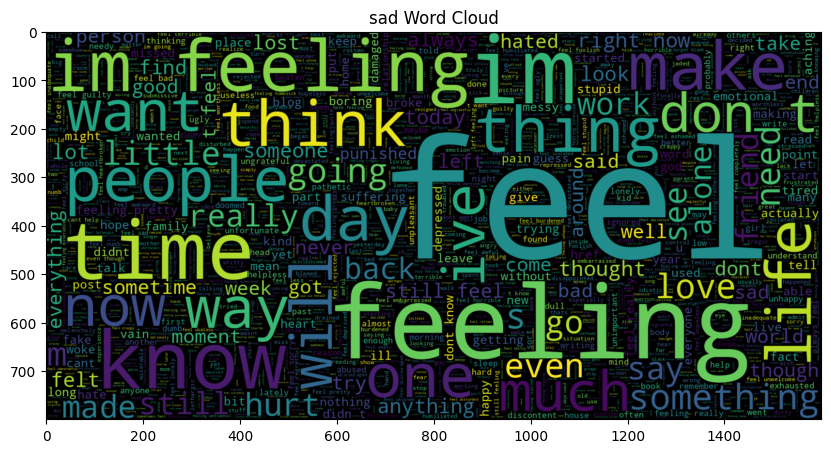

In [18]:
#sad word cloud
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
# Use the 'News' column instead of the 'label' column
wc=WordCloud(max_words=2000,width=1600,height=800).generate(' '.join(data[data['label']==0]['text'].astype(str)))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("sad Word Cloud")

Text(0.5, 1.0, 'sad Word Cloud')

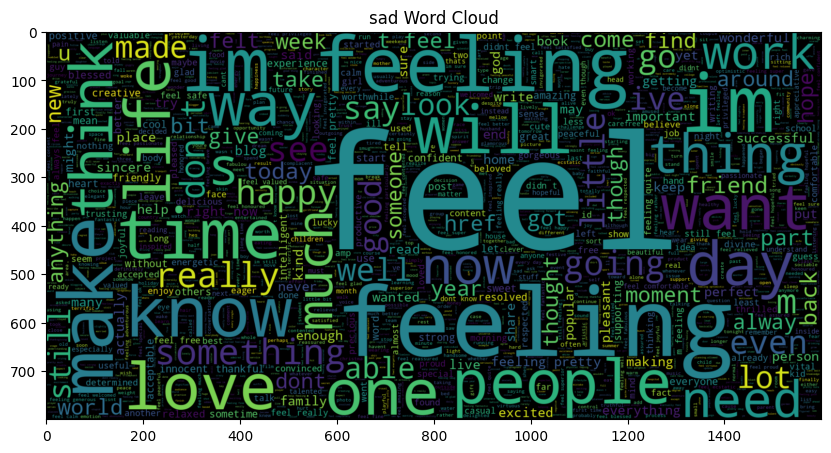

In [19]:
#joy word cloud
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
# Use the 'News' column instead of the 'label' column
wc=WordCloud(max_words=2000,width=1600,height=800).generate(' '.join(data[data['label']==1]['text'].astype(str)))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("sad Word Cloud")

In [20]:
import numpy as np
y=np.array(data['label'])

In [21]:
from sklearn.model_selection import train_test_split
#Breaking into Train and test
X_train, X_test, y_train, y_test = train_test_split(preprocessed_text, y, test_size=0.3,stratify=y ,random_state=42)

In [23]:
import pickle
from sklearn import preprocessing

count_vect = CountVectorizer()
count_trans = count_vect.fit(X_train) # fit has to happen only on train data

# Dump the file
pickle.dump(count_trans, open(r"/content/drive/MyDrive/WHATSAPP_CHAT/count_vect.pkl", "wb"))


# Testing phase
count = pickle.load(open(r"/content/drive/MyDrive/WHATSAPP_CHAT/count_vect.pkl", 'rb'))

# we use the fitted CountVectorizer to convert the text to vector
X_train_count =count.transform(X_train)
X_test_count = count.transform(X_test)

#Normalize Data
X_train_count = preprocessing.normalize(X_train_count)
print("Train Data Size: ",X_train_count.shape)

#Normalize Data
X_test_count = preprocessing.normalize(X_test_count)
print("Test Data Size: ",X_test_count.shape)

Train Data Size:  (291766, 63498)
Test Data Size:  (125043, 63498)


In [24]:
from sklearn.metrics import accuracy_score

In [25]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Training XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=50,  # Number of trees (boosting rounds)
    max_depth=20        # Maximum depth of a tree
)
xgb_model.fit(X_train_count, y_train)

# Saving the model
filename = r'/content/drive/MyDrive/WHATSAPP_CHAT/xgboost_model.pkl'
pickle.dump(xgb_model, open(filename, 'wb'))

# Making predictions
pred_test = xgb_model.predict(X_test_count)
test_accuracy = accuracy_score(y_test, pred_test)
pred_train = xgb_model.predict(X_train_count)
train_accuracy = accuracy_score(y_train, pred_train)

# Printing accuracies
print("Accuracy on Test data is " + str(test_accuracy))
print("Accuracy on Train data is " + str(train_accuracy))

print("---------------------------")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:04:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on Test data is 0.8844877362187408
Accuracy on Train data is 0.9378268886710583
---------------------------


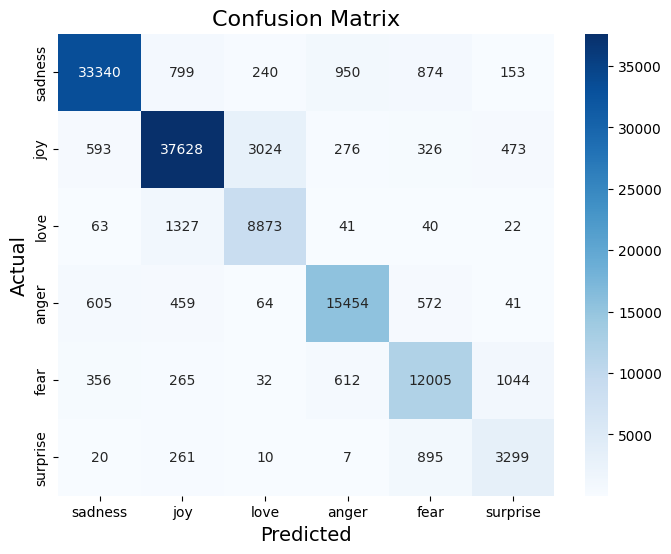

In [26]:
# sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).
# Confusion matrix and heatmap
class_names = ['sadness', 'joy','love','anger','fear','surprise']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test), index=class_names, columns=class_names)
fig = plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.show()

In [27]:
from sklearn.metrics import accuracy_score, classification_report
class_names = ['sadness', 'joy','love','anger','fear','surprise']
print("Classification Report:")
print(classification_report(y_test, pred_test, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

     sadness       0.95      0.92      0.93     36356
         joy       0.92      0.89      0.91     42320
        love       0.72      0.86      0.78     10366
       anger       0.89      0.90      0.89     17195
        fear       0.82      0.84      0.83     14314
    surprise       0.66      0.73      0.69      4492

    accuracy                           0.88    125043
   macro avg       0.83      0.86      0.84    125043
weighted avg       0.89      0.88      0.89    125043



In [28]:
!pip install lightgbm

In [29]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(boosting_type='goss')
lgbm.fit(X_train_count, y_train)

# Saving the model
filename = r'/content/drive/MyDrive/WHATSAPP_CHAT/lgbm_model.pkl'
pickle.dump(lgbm, open(filename, 'wb'))

# Making predictions
pred_test = lgbm.predict(X_test_count)
test_accuracy = accuracy_score(y_test, pred_test)
pred_train = lgbm.predict(X_train_count)
train_accuracy = accuracy_score(y_train, pred_train)

# Printing accuracies
print("Accuracy on Test data is " + str(test_accuracy))
print("Accuracy on Train data is " + str(train_accuracy))

print("---------------------------")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 55.899507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126486
[LightGBM] [Info] Number of data points in the train set: 291766, number of used features: 8304
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score -1.235291
[LightGBM] [Info] Start training from score -1.083391
[LightGBM] [Info] Start training from score -2.490095
[LightGBM] [Info] Start 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
Accuracy on Test data is 0.9055125036987276
Accuracy on Train data is 0.9156584386117642
---------------------------


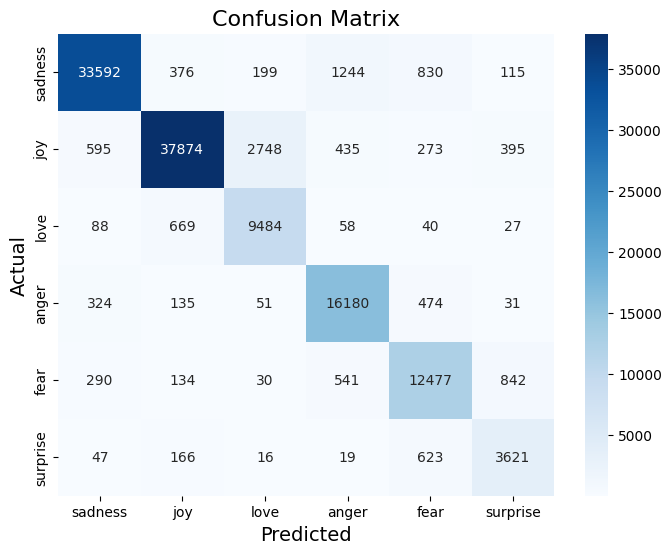

In [30]:
# Confusion matrix and heatmap
class_names = ['sadness', 'joy','love','anger','fear','surprise']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test), index=class_names, columns=class_names)
fig = plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.show()

In [31]:
from sklearn.metrics import accuracy_score, classification_report
class_names = ['sadness', 'joy','love','anger','fear','surprise']
print("Classification Report:")
print(classification_report(y_test, pred_test, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

     sadness       0.96      0.92      0.94     36356
         joy       0.96      0.89      0.93     42320
        love       0.76      0.91      0.83     10366
       anger       0.88      0.94      0.91     17195
        fear       0.85      0.87      0.86     14314
    surprise       0.72      0.81      0.76      4492

    accuracy                           0.91    125043
   macro avg       0.85      0.89      0.87    125043
weighted avg       0.91      0.91      0.91    125043



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pickle

# Define parameters
max_words = 5000  # Vocabulary size
max_len = 100  # Maximum sequence length

# Tokenization
#Instead of using X_train_count which is the output of CountVectorizer, use X_train,
#which contains the original preprocessed text data as a list of strings.
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train) #Use X_train here

# Convert text data into sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Convert labels to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Define LSTM Model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Change to softmax for multi-class classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test))

# Evaluate model
train_accuracy = model.evaluate(X_train_pad, y_train, verbose=0)[1]
test_accuracy = model.evaluate(X_test_pad, y_test, verbose=0)[1]

# Print accuracies
print("Accuracy on Train data:", train_accuracy)
print("Accuracy on Test data:", test_accuracy)

# Save model
model.save(r'/content/drive/MyDrive/WHATSAPP_CHAT/lstm_model.h5')

# Save tokenizer
with open(r'/content/drive/MyDrive/WHATSAPP_CHAT/tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
9118/9118 ━━━━━━━━━━━━━━━━━━━━ 2884s 316ms/step - accuracy: 0.3365 - loss: -8017.9087 - val_accuracy: 0.3384 - val_loss: -60645.0586
Epoch 2/10
4136/9118 ━━━━━━━━━━━━━━━━━━━━ 23:07 278ms/step - accuracy: 0.3396 - loss: -73479.6328